#### 04.04.24 - 17.36
#### Bedirhan Kömürcü

#

# Librarys

In [1]:
import os
import pickle

from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

E:\Development\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Prepare Data (img to DF)

In [14]:
input_dir = r"C:\Users\Bedirhan\Desktop\Lung Project\Lung X-Ray Image"
categories = ['Lung_Opacity', 'Normal','Viral Pneumonia']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

In [15]:
df = pd.DataFrame(data)
df['labels'] = labels
df.tail(7)

,0,1,2,3,4,5,6,7,8,9,...,666,667,668,669,670,671,672,673,674,labels
3468,0.207871,0.361602,0.535454,0.154228,0.582041,0.526656,0.153220,0.654180,0.508209,0.146155,...,0.350403,0.763500,0.391353,0.231111,0.464135,0.452536,0.261163,0.041415,0.344679,2
3469,0.267806,0.595722,0.467969,0.153323,0.541392,0.538219,0.152466,0.499459,0.553638,0.159230,...,0.495579,0.775785,0.304236,0.289280,0.346294,0.458066,0.275814,0.181283,0.486082,2
3470,0.267863,0.019714,0.342046,0.243601,0.223928,0.477010,0.162552,0.509442,0.540339,0.179475,...,0.330141,0.759441,0.403200,0.223315,0.426985,0.456984,0.261996,0.036179,0.344723,2
3471,0.290252,0.243257,0.396524,0.216886,0.328840,0.511246,0.126890,0.578161,0.538064,0.120542,...,0.190831,0.615473,0.502506,0.222585,0.271362,0.472256,0.265613,0.020775,0.339465,2
3472,0.131428,0.564098,0.548495,0.149739,0.547392,0.542847,0.144316,0.540849,0.542937,0.152296,...,0.310043,0.760510,0.412553,0.200171,0.548040,0.493869,0.260103,0.144176,0.429341,2
3473,0.234838,0.343173,0.515586,0.143158,0.570692,0.535134,0.125960,0.605996,0.534161,0.145614,...,0.272823,0.676560,0.435211,0.248409,0.195950,0.401333,0.243102,0.137718,0.393734,2
3474,0.187020,0.410589,0.548482,0.164107,0.466066,0.552982,0.154526,0.501205,0.547811,0.131834,...,0.132131,0.580104,0.544136,0.185110,0.398863,0.527419,0.262137,0.066964,0.371829,2


In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,666,667,668,669,670,671,672,673,674,labels
count,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,...,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000,3475.000000
mean,0.257222,0.206514,0.420233,0.241571,0.255093,0.441816,0.232530,0.292326,0.452217,0.233613,...,0.332795,0.645479,0.405263,0.278301,0.450038,0.431685,0.272476,0.260234,0.411904,0.992806
std,0.052647,0.192977,0.071365,0.053888,0.211910,0.075830,0.057773,0.227970,0.075976,0.061126,...,0.182806,0.191257,0.114774,0.131951,0.241580,0.087125,0.094668,0.241313,0.075388,0.800263
min,0.122036,0.000000,0.095365,0.122941,0.000000,0.099605,0.121029,0.000000,0.102049,0.120542,...,0.122480,0.000000,0.094424,0.125730,0.000000,0.094019,0.128052,0.000000,0.099141,0.000000
25%,0.244381,0.049533,0.359987,0.210392,0.064716,0.372904,0.190155,0.081198,0.383559,0.187008,...,0.195871,0.556800,0.339482,0.205638,0.254860,0.393933,0.240980,0.067018,0.361574,0.000000
50%,0.265200,0.145619,0.408130,0.258619,0.199815,0.442237,0.251723,0.245857,0.458565,0.248429,...,0.265386,0.689530,0.437419,0.243620,0.458967,0.453017,0.262153,0.173574,0.410537,1.000000
75%,0.271614,0.316488,0.479038,0.268739,0.423393,0.518071,0.267445,0.494228,0.525760,0.267383,...,0.423538,0.788176,0.496526,0.275578,0.640316,0.491658,0.271857,0.411649,0.468449,2.000000
max,0.930801,0.896888,0.557331,0.848375,0.885854,0.558525,0.838823,0.883019,0.558925,0.839046,...,0.971500,0.901815,0.558202,0.973537,0.903420,0.556823,0.962257,0.902921,0.557216,2.000000


# X & Y Split

In [29]:
y = df.labels.values.reshape(-1,1)
x = df.drop(["labels"],axis = 1)
x

,0,1,2,3,4,5,6,7,8,9,...,665,666,667,668,669,670,671,672,673,674
0,0.274418,0.065056,0.387734,0.273428,0.065028,0.387985,0.268885,0.087687,0.400378,0.251266,...,0.182396,0.605770,0.847499,0.235064,0.444367,0.800743,0.333891,0.255568,0.524213,0.463867
1,0.273696,0.075550,0.394793,0.255063,0.148584,0.417157,0.248255,0.206802,0.450499,0.223395,...,0.106179,0.910505,0.895706,0.109576,0.920043,0.895839,0.109917,0.836381,0.883167,0.124535
2,0.266618,0.000668,0.325803,0.266663,0.005387,0.329559,0.267086,0.024172,0.344555,0.264931,...,0.404567,0.315972,0.769151,0.405794,0.301097,0.762966,0.416095,0.340088,0.774970,0.397773
3,0.274509,0.031372,0.356862,0.274498,0.031373,0.356860,0.274484,0.031322,0.356828,0.274463,...,0.390980,0.242082,0.690825,0.459033,0.208216,0.377295,0.483822,0.266470,0.051900,0.364649
4,0.211534,0.436543,0.516062,0.209838,0.621471,0.492057,0.178655,0.658340,0.496570,0.230663,...,0.210109,0.468775,0.807925,0.319725,0.257768,0.699144,0.451016,0.182625,0.456241,0.540308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,0.267863,0.019714,0.342046,0.243601,0.223928,0.477010,0.162552,0.509442,0.540339,0.179475,...,0.317004,0.330141,0.759441,0.403200,0.223315,0.426985,0.456984,0.261996,0.036179,0.344723
3471,0.290252,0.243257,0.396524,0.216886,0.328840,0.511246,0.126890,0.578161,0.538064,0.120542,...,0.432448,0.190831,0.615473,0.502506,0.222585,0.271362,0.472256,0.265613,0.020775,0.339465
3472,0.131428,0.564098,0.548495,0.149739,0.547392,0.542847,0.144316,0.540849,0.542937,0.152296,...,0.380194,0.310043,0.760510,0.412553,0.200171,0.548040,0.493869,0.260103,0.144176,0.429341
3473,0.234838,0.343173,0.515586,0.143158,0.570692,0.535134,0.125960,0.605996,0.534161,0.145614,...,0.338828,0.272823,0.676560,0.435211,0.248409,0.195950,0.401333,0.243102,0.137718,0.393734


# Train - Test Split

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train.ravel())

print("test accuracy {}".format(lr.score(x_test , y_test)))

test accuracy 0.879136690647482


E:\Development\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

accuracys = []
interval = np.arange(1, 25)

for i in interval:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train.values,y_train.ravel())
    
    accuracys.append(knn.score(x_train.values, y_train.ravel()))

([<matplotlib.axis.XTick at 0x1d8d1eada90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

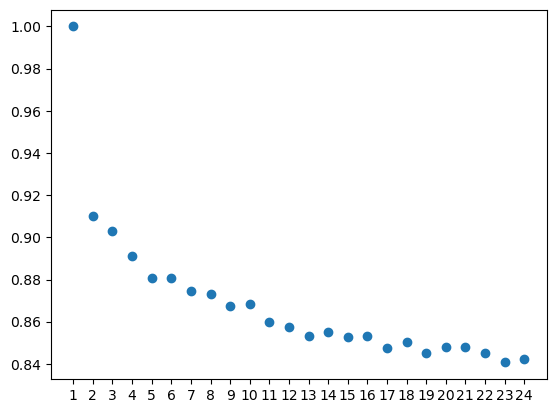

In [59]:
import matplotlib.pyplot as plt
plt.scatter(interval, accuracys)
plt.xticks(interval)